LAB 8:

1. Directed Graph Visualization

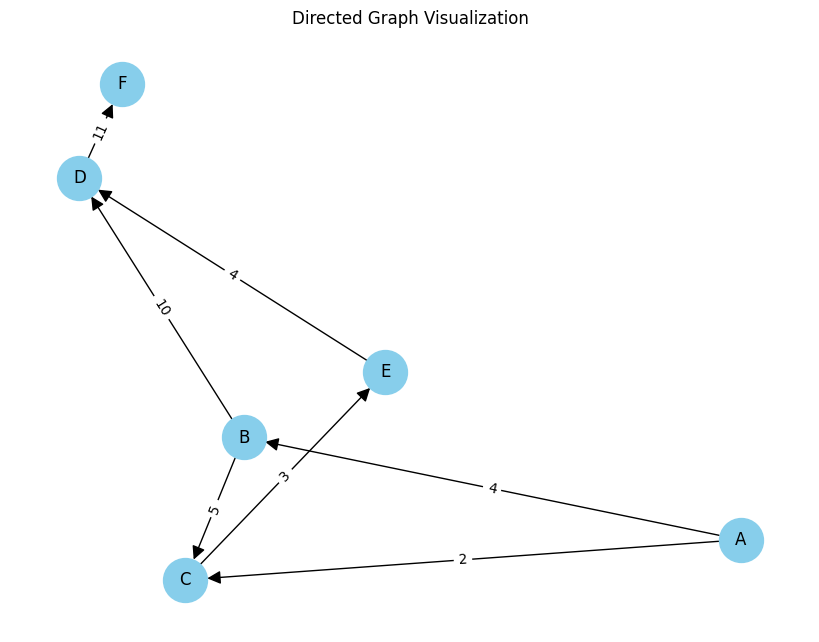

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Sample weighted directed graph data
edges = [
    ('A', 'B', 4),
    ('A', 'C', 2),
    ('B', 'C', 5),
    ('B', 'D', 10),
    ('C', 'E', 3),
    ('E', 'D', 4),
    ('D', 'F', 11),
]

G_directed = nx.DiGraph()
G_directed.add_weighted_edges_from(edges)

pos = nx.spring_layout(G_directed, seed=42)

plt.figure(figsize=(8,6))
nx.draw(G_directed, pos, with_labels=True, node_color='skyblue', node_size=1000, arrowsize=20, arrowstyle='-|>')
edge_labels = nx.get_edge_attributes(G_directed, 'weight')
nx.draw_networkx_edge_labels(G_directed, pos, edge_labels=edge_labels)

plt.title('Directed Graph Visualization')
plt.show()


2. Undirected Graph Visulaization

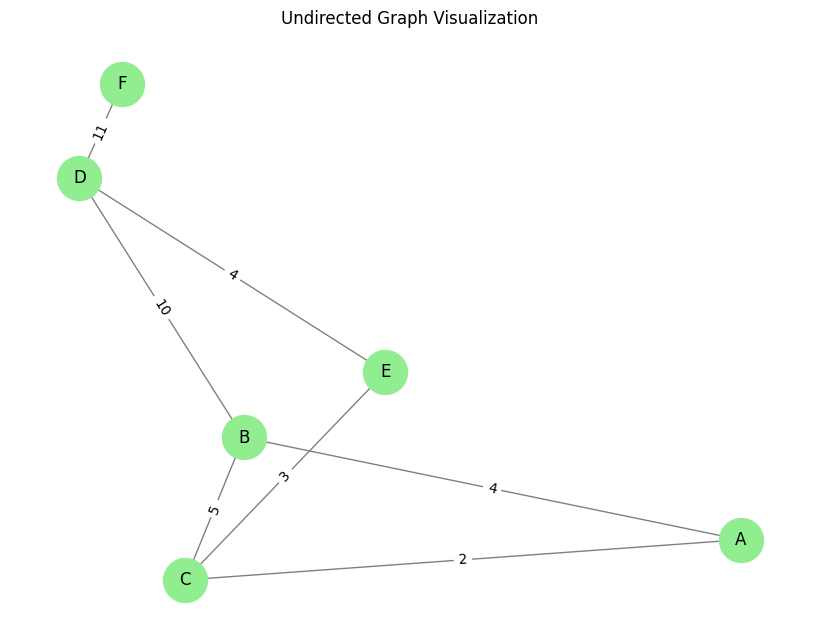

In [2]:
G_undirected = G_directed.to_undirected()

plt.figure(figsize=(8,6))
nx.draw(G_undirected, pos, with_labels=True, node_color='lightgreen', node_size=1000, edge_color='gray')
edge_labels = nx.get_edge_attributes(G_undirected, 'weight')
nx.draw_networkx_edge_labels(G_undirected, pos, edge_labels=edge_labels)

plt.title('Undirected Graph Visualization')
plt.show()


3. Weighted Graph Visualization

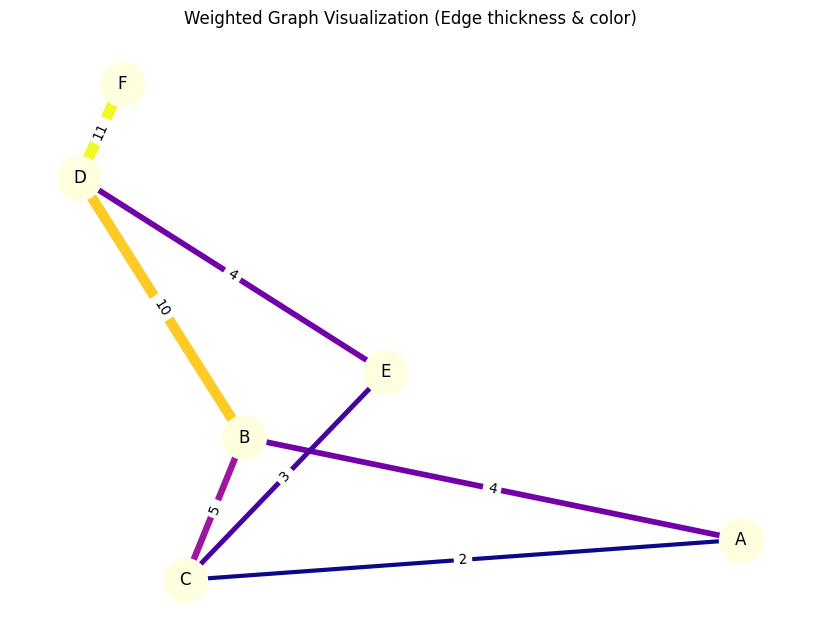

In [3]:
weights = [G_undirected[u][v]['weight'] for u, v in G_undirected.edges()]
max_weight = max(weights)
min_weight = min(weights)

# Normalize edge thickness and color intensity (between 1 and 8)
edge_widths = [3 + 5*(w - min_weight)/(max_weight - min_weight) for w in weights]
edge_colors = [(w - min_weight)/(max_weight - min_weight) for w in weights]

plt.figure(figsize=(8,6))
nx.draw(G_undirected, pos, with_labels=True, node_color='lightyellow', node_size=1000,
        width=edge_widths, edge_color=edge_colors, edge_cmap=plt.cm.plasma)
nx.draw_networkx_edge_labels(G_undirected, pos, edge_labels=nx.get_edge_attributes(G_undirected, 'weight'))

plt.title('Weighted Graph Visualization (Edge thickness & color)')
plt.show()


4. Algorithm Implementation: Kruskal’s Minimum Spanning Tree (MST)

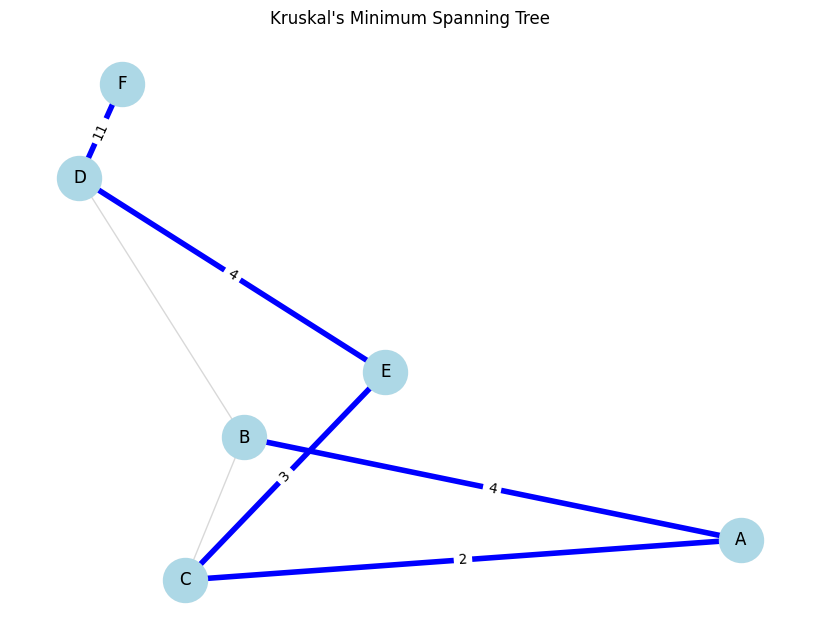

In [4]:
from networkx.algorithms.tree import minimum_spanning_edges

# Kruskal's MST edges generator
mst_edges = list(minimum_spanning_edges(G_undirected, algorithm='kruskal', data=True))

# Extract MST edges and create MST graph
MST = nx.Graph()
MST.add_weighted_edges_from([(u, v, d['weight']) for u, v, d in mst_edges])

# Visualize final MST
plt.figure(figsize=(8,6))
nx.draw(G_undirected, pos, with_labels=True, node_color='lightgray', node_size=1000, edge_color='gray', alpha=0.3)
nx.draw(MST, pos, with_labels=True, node_color='lightblue', node_size=1000, width=4, edge_color='blue')

edge_labels = nx.get_edge_attributes(MST, 'weight')
nx.draw_networkx_edge_labels(MST, pos, edge_labels=edge_labels)

plt.title("Kruskal's Minimum Spanning Tree")
plt.show()
